In [229]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [304]:
original_waypoints = np.loadtxt('race1_gtl3.csv', delimiter=',')
lobby_map = cv2.imread('../map/race_1.pgm', cv2.IMREAD_GRAYSCALE)


In [305]:
resolution = 0.05
origin = [-8.99, -1.15]

In [306]:
segment_points = [
    # x, y, vel, lookahead, p, d
    [-6.2, 0.7, 1.0, 1.5, 0.35, 0.01],
    [-4.5, -0.5, 1.05, 1.5, 0.2, 0.01],
    [0.654, -0.5, 0.75, 1.2, 0.4, 0.02],
    [2.6, 0.45, 0.7, 1.5, 0.3, 0.05],
    [3.9, 2.0, 0.9, 1.5, 0.4, 0.05], # haripin 1
    [4.1, 4.0, 0.8, 1.5, 0.4, 0.1],
    [2.6, 4.8, 0.9, 1.0, 0.3, 0.05], #6
    [1.2, 3.8, 0.8, 1.0, 0.3, 0.01], #7
    [0.3, 2.6, 1.0, 1.5, 0.25, 0.02],
    [-2.2, 2.3, 0.8, 1.0, 0.15, 0.02], 
    [-4.7, 2.5, 0.7, 1.5, 0.35, 0.01], # hairpin 2
    [-5.8, 1.8, 0.8, 1.5, 0.35, 0.01]
    ]
segment_points = np.array(segment_points)

(-9.62999939918518, 6.650000810623169, -1.5650000631809236, 8.665000802278518)

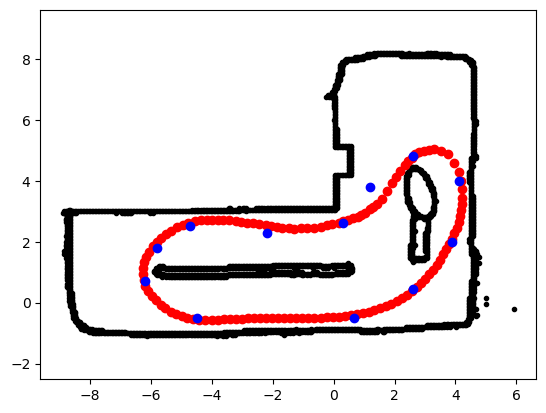

In [307]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')
plt.plot(original_waypoints[:,0], original_waypoints[:,1], 'ro')
plt.plot(segment_points[:,0], segment_points[:,1], 'bo')
plt.axis('equal')

In [312]:
segment_points = np.array(segment_points)
seg_start_idx = []
for i in range(segment_points.shape[0]):
    point = segment_points[i, :2]
    dist = np.linalg.norm(original_waypoints[:,:2] - point, axis=1)
    idx = np.argmin(dist)
    seg_start_idx.append(idx)
print(seg_start_idx)

# print(original_waypoints)
seg_waypoints = np.zeros((original_waypoints.shape[0], 8))
seg_waypoints[:, :3] = original_waypoints[:, [0, 1, 2]]
seg_start_idx.append(seg_start_idx[0])
for i in range(len(seg_start_idx)-1):
    if seg_start_idx[i] > seg_start_idx[i+1]:
        for j in range(seg_start_idx[i], original_waypoints.shape[0]):
            seg_waypoints[j, 3:-1] = segment_points[i, 2:]
            seg_waypoints[j, -1] = i
        for j in range(seg_start_idx[i+1]):
            seg_waypoints[j, 3:-1] = segment_points[0, 2:]
            seg_waypoints[j, -1] = i
    else:
        for j in range(seg_start_idx[i], seg_start_idx[i+1]):
            seg_waypoints[j, 3:-1] = segment_points[i, 2:]
            seg_waypoints[j, -1] = i

[54, 65, 91, 102, 113, 122, 132, 5, 15, 28, 41, 48]


In [309]:
np.savetxt('race1_gtl3_seg.csv', seg_waypoints, delimiter=',', fmt='%.3f')

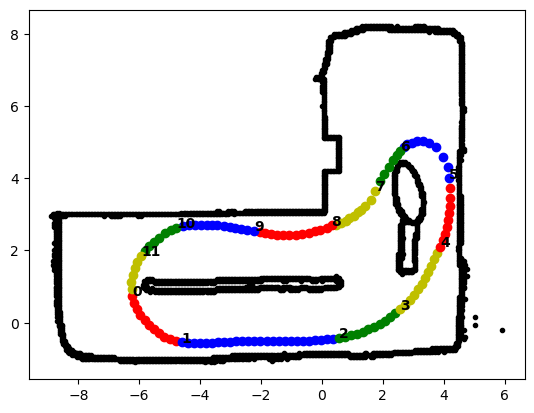

In [310]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
colors = ['ro', 'bo', 'go', 'yo']
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')
for i in range(len(seg_start_idx)-1):
    plt.plot(seg_waypoints[np.where(seg_waypoints[:,6] == i),0], seg_waypoints[np.where(seg_waypoints[:,6] == i),1], colors[i%4])
    plt.text(seg_waypoints[seg_start_idx[i], 0], seg_waypoints[seg_start_idx[i], 1], str(i), fontweight='bold')

(-9.62999939918518, 6.650000810623169, -1.5650000631809236, 8.665000802278518)

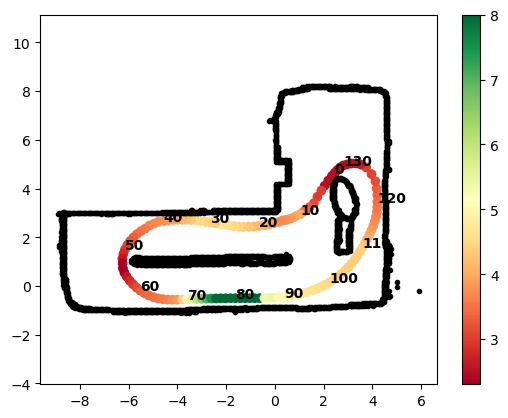

In [313]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
colors = ['ro', 'bo', 'go', 'yo']
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')


# velocities = seg_waypoints[:,2]
# gloabl_v_min = velocities.min()
# global_v_max = velocities.max()

# set_v_min = 2.0
# set_v_max = 5.0

# velocities = (velocities - gloabl_v_min) / (global_v_max - gloabl_v_min) * (set_v_max - set_v_min) + set_v_min

plt.scatter(seg_waypoints[:,0], seg_waypoints[:,1], c=seg_waypoints[:,2], cmap='RdYlGn')
for i in range(len(seg_waypoints)):
    if i % 10 == 0:
        plt.text(seg_waypoints[i, 0], seg_waypoints[i, 1], str(i), fontweight='bold')
plt.colorbar()
plt.axis('equal')